In [7]:
import math

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy import stats

## Golden Codys

- 1/4 chance to win
- 1000 tickets

([<matplotlib.axis.XTick at 0x1a19316b90>,
 <a list of 2 Text xticklabel objects>)

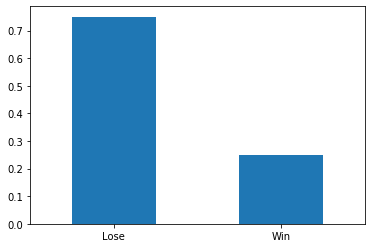

In [8]:
tickets = pd.Series([True] * 250 + [False] * 750)
tickets.value_counts(normalize=True).plot.bar()
plt.xticks([0,1], ['Lose', 'Win'], rotation=0)

In [10]:
# Give everyone in the class a ticket

n = 25
tickets.sample(n).mean()

0.16

In [11]:
for i in range(5):
    winrate = tickets.sample(n).mean()
    print(winrate)

0.2
0.08
0.24
0.32
0.2


In [18]:
winrates = []

for i in range(10_000):
    winrate = tickets.sample(n).mean()
    winrates.append(winrate)

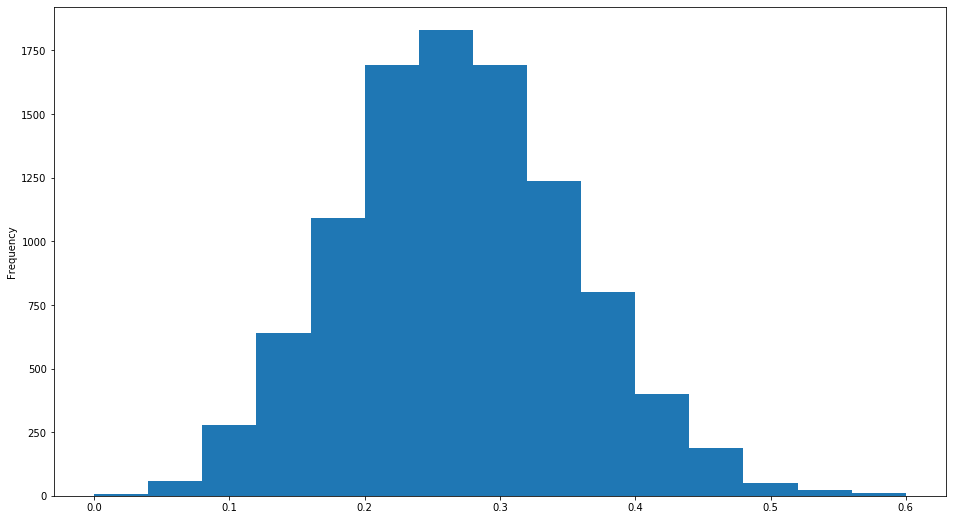

In [19]:
pd.Series(winrates).plot.hist(bins=15, figsize=(16, 9))

### what is likelihood we see 20% or less winrate (w/ 25 students)?

In [20]:
winrate_prob = pd.Series(winrates)
(winrate_prob <= .2).mean()

0.3764

In [23]:
stats.norm(winrate_prob.mean(), winrate_prob.std()).cdf(.2)

0.28106569963898576

### what is likelihood we see 20% or less winrate (w/ 25 students) or something more extreme?


In [24]:
stats.norm(winrate_prob.mean(), winrate_prob.std()).cdf(.2) + stats.norm(winrate_prob.mean(), winrate_prob.std()).sf(.29)

0.6003190225423167

### how likely is it we see a 40% winrate or something more extreme?

In [26]:
dist = stats.norm(winrate_prob.mean(), winrate_prob.std())

dist.sf(.4) + dist.cdf(.1)

0.08027361154071977

In [27]:
# change # of tix to 40

n = 40
tickets.sample(n).mean()

0.275

In [28]:
winrates = []

for i in range(10_000):
    winrate = tickets.sample(n).mean()
    winrates.append(winrate)

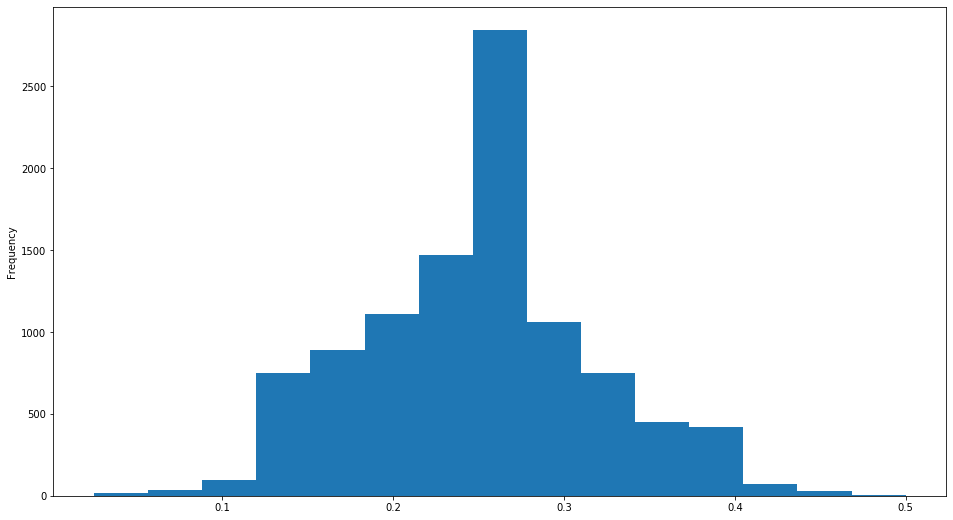

In [29]:
pd.Series(winrates).plot.hist(bins=15, figsize=(16, 9))

In [30]:
winrate_prob = pd.Series(winrates)
(winrate_prob <= .2).mean()

0.2904

In [31]:
stats.norm(winrate_prob.mean(), winrate_prob.std()).cdf(.2)

0.22918998445783922

Sampling errors

- non-response
- undercoverage
- voluntary
- leading questions
- social desireability


### Central Limit Theorem:

The **sampling distribution** is normally distributed even when the underlying random variable is not.

- the avg of the sampling distribution ~ the population avg
- the variance of the sampling distribution is the variance of the population divided by the sample size
- the std dev of the sampling distribution is ~ population std dev / sqrt(n)

## Mini Exercise

1. calculate theoretically the expected value for the avg of 6 dice rolls
2. Write the code necessary to simulate taking the average of 6 dice rolls 10,000 times. Store each of the 10,000 averages in a list.
3. Plot the distribution of the calculated averages. What do you notice? What kind of distribution is the underlying random variable (i.e. one dice roll?)

In [54]:
rolls = stats.randint(1, 7).rvs([1, 6])
rolls.mean()

2.5

In [57]:
rolls

array([[2, 4, 3, 4, 1, 1]])

In [65]:
rolls = np.random.choice([1, 2, 3, 4, 5, 6], (10_001, 6))

In [68]:
rolls = pd.DataFrame(rolls)
rolls

,0,1,2,3,4,5
0,1,2,4,5,5,3
1,1,5,3,4,6,1
2,2,2,4,1,2,2
3,6,6,2,2,2,5
4,6,4,4,6,6,6
...,...,...,...,...,...,...
9996,1,6,4,4,3,3
9997,3,3,5,1,3,1
9998,3,4,6,1,4,3
9999,5,6,4,1,2,2


In [70]:
rolls['mean'] = rolls.mean(axis=1)
rolls

,0,1,2,3,4,5,mean
0,1,2,4,5,5,3,3.333333
1,1,5,3,4,6,1,3.333333
2,2,2,4,1,2,2,2.166667
3,6,6,2,2,2,5,3.833333
4,6,4,4,6,6,6,5.333333
...,...,...,...,...,...,...,...
9996,1,6,4,4,3,3,3.500000
9997,3,3,5,1,3,1,2.666667
9998,3,4,6,1,4,3,3.500000
9999,5,6,4,1,2,2,3.333333


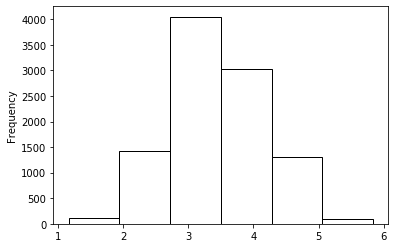

In [81]:
pd.Series(rolls['mean']).plot.hist(bins=6, fc='white', ec='black')

## Hypotheses

- $H_0$: "status quo"
- $H_a$: alternative
- $\alpha$: 1 - confidence level
- P(data|$H_0$)
- if p < $\alpha$: reject $H_0$
- if p >= $\alpha$: fail to reject $H_0$

## Mini Exercises

- Are the average grades in web development vs data science classes different?
- Is there a relationship between how early a student shows up to class and their grade?
- Are web dev or data science students more likely to be coffee drinkers?

$H_0$: mean of web dev == mean of data science
- $H_a$: mean of web dev != mean of data science
- $H_a$: mean of web dev < mean of data science
- $H_a$: mean of web dev > mean of data science

$H_0$: there is no relationship
- $H_a$: there is a relationship
- $H_a$: grades are lower if students come earlier
- $H_a$: grades are higher if students come earlier

$H_0$: web dev and data science are equally likely
- $H_a$: web dev students are more likely
- $H_a$: data science students are more likely